# How Does A State's Education Ranking Relate to its Unemployment and Cost of Living Rankings?
### Does education really improve quality of life?
###### By SreeKeerthi ManurSreekantaMurthyGari


In [1]:
import requests
from bs4 import BeautifulSoup as bs
import numpy as np
import pandas as pd
import json
from collections import defaultdict
import matplotlib.pyplot as plt
import sklearn

In [4]:
data1 = pd.read_json('CostJsonData.json')
# Json file taken from https://worldpopulationreview.com/state-rankings/cost-of-living-index-by-state 

df1 = data1.head(n=50)

df1.drop(["groceryCost", "housingCost", "utilitiesCost", "transportationCost", "miscCost"], axis=1, inplace=True)
df1.rename(columns = {'state':'State'}, inplace = True)
df1.rename(columns = {'costIndex':'Cost To Live Index'}, inplace = True)

print(df1)

             State  Cost To Live Index
0      Mississippi                83.3
1           Kansas                86.5
2          Alabama                87.9
3         Oklahoma                87.9
4          Georgia                88.8
5        Tennessee                89.0
6         Missouri                89.8
7             Iowa                89.9
8    West Virginia                90.5
9          Indiana                90.6
10        Arkansas                90.9
11      New Mexico                91.0
12        Michigan                91.3
13            Ohio                91.3
14           Texas                92.1
15       Louisiana                93.0
16        Kentucky                93.1
17  South Carolina                93.6
18        Nebraska                93.7
19        Illinois                94.3
20         Wyoming                94.3
21  North Carolina                95.7
22       Wisconsin                96.4
23    North Dakota                98.2
24            Utah       

/var/folders/r9/k26kfpt564s2c2bv1z9yf2tr0000gn/T/ipykernel_14268/1314971530.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.drop(["groceryCost", "housingCost", "utilitiesCost", "transportationCost", "miscCost"], axis=1, inplace=True)
/var/folders/r9/k26kfpt564s2c2bv1z9yf2tr0000gn/T/ipykernel_14268/1314971530.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.rename(columns = {'state':'State'}, inplace = True)
/var/folders/r9/k26kfpt564s2c2bv1z9yf2tr0000gn/T/ipykernel_14268/1314971530.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the doc

In [5]:
data2 = pd.read_json('UnemJsonData.json')
# Json file taken from https://worldpopulationreview.com/state-rankings/unemployment-rate-by-state 

df_2 = data2.head(n=50)

df_2.drop(["rate21"], axis=1, inplace=True)
df_2.rename(columns = {'state':'State'}, inplace = True)
df_2.rename(columns = {'rate22':'Unemployment Rate'}, inplace = True)

df2 = df_2.reindex([31, 7, 10, 19, 17, 26, 9, 8, 36, 12, 24, 49, 42, 39, 40, 30, 33, 22, 1, 45, 21, 27, 20, 5, 3, 0, 13, 14, 6, 16, 11, 43, 23, 25, 46, 44, 2, 35, 18, 34, 4, 15, 32, 38, 48, 29, 28, 37, 47, 41])

output1 = pd.merge(df1, df2, how='inner')

print(output1)

             State  Cost To Live Index  Unemployment Rate
0      Mississippi                83.3                3.6
1           Kansas                86.5                2.4
2          Alabama                87.9                2.6
3         Oklahoma                87.9                3.0
4          Georgia                88.8                2.8
5        Tennessee                89.0                3.3
6         Missouri                89.8                2.5
7             Iowa                89.9                2.5
8    West Virginia                90.5                3.7
9          Indiana                90.6                2.6
10        Arkansas                90.9                3.3
11      New Mexico                91.0                4.5
12        Michigan                91.3                4.2
13            Ohio                91.3                3.9
14           Texas                92.1                4.0
15       Louisiana                93.0                3.6
16        Kent

/var/folders/r9/k26kfpt564s2c2bv1z9yf2tr0000gn/T/ipykernel_14268/455158441.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2.drop(["rate21"], axis=1, inplace=True)
/var/folders/r9/k26kfpt564s2c2bv1z9yf2tr0000gn/T/ipykernel_14268/455158441.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2.rename(columns = {'state':'State'}, inplace = True)
/var/folders/r9/k26kfpt564s2c2bv1z9yf2tr0000gn/T/ipykernel_14268/455158441.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/inde

In [6]:
data3 = pd.read_json('EducJsonData.json')
# Json file taken from https://worldpopulationreview.com/state-rankings/best-states-for-education 

df_3 = data3.head(n=50)

df_3.drop(["higherEducationRank"], axis=1, inplace=True)
df_3.drop(["prek12Rank"], axis=1, inplace=True)
df_3.rename(columns = {'state':'State'}, inplace = True)
df_3.rename(columns = {'overallRank':'Education Rank'}, inplace = True)

df3 = df_3.reindex([42, 22, 46, 41, 25, 32, 29, 17, 44, 21, 40, 49, 37, 30, 33, 47, 35, 43, 8, 10, 20, 6, 7, 24, 9, 16, 2, 31, 18, 11, 28, 36, 45, 4, 39, 23, 12, 3, 27, 0, 14, 38, 5, 13, 48, 34, 1, 19, 15, 26])

#print(df3)

finalset = pd.merge(output1, df3, how='inner')

print(finalset)

             State  Cost To Live Index  Unemployment Rate  Education Rank
0      Mississippi                83.3                3.6              43
1           Kansas                86.5                2.4              23
2          Alabama                87.9                2.6              47
3         Oklahoma                87.9                3.0              42
4          Georgia                88.8                2.8              26
5        Tennessee                89.0                3.3              33
6         Missouri                89.8                2.5              30
7             Iowa                89.9                2.5              18
8    West Virginia                90.5                3.7              45
9          Indiana                90.6                2.6              22
10        Arkansas                90.9                3.3              41
11      New Mexico                91.0                4.5              50
12        Michigan                91.3

/var/folders/r9/k26kfpt564s2c2bv1z9yf2tr0000gn/T/ipykernel_14268/4028422397.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_3.drop(["higherEducationRank"], axis=1, inplace=True)
/var/folders/r9/k26kfpt564s2c2bv1z9yf2tr0000gn/T/ipykernel_14268/4028422397.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_3.drop(["prek12Rank"], axis=1, inplace=True)
/var/folders/r9/k26kfpt564s2c2bv1z9yf2tr0000gn/T/ipykernel_14268/4028422397.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_gui

In [7]:
finalset.to_csv("CleanedSet.csv")

In [8]:
rankings = pd.read_csv("CleanedSet.csv")
rankings.drop(["Unnamed: 0"], axis=1, inplace=True)
print(rankings)

             State  Cost To Live Index  Unemployment Rate  Education Rank
0      Mississippi                83.3                3.6              43
1           Kansas                86.5                2.4              23
2          Alabama                87.9                2.6              47
3         Oklahoma                87.9                3.0              42
4          Georgia                88.8                2.8              26
5        Tennessee                89.0                3.3              33
6         Missouri                89.8                2.5              30
7             Iowa                89.9                2.5              18
8    West Virginia                90.5                3.7              45
9          Indiana                90.6                2.6              22
10        Arkansas                90.9                3.3              41
11      New Mexico                91.0                4.5              50
12        Michigan                91.3

In [9]:
others = rankings.copy(deep=True)
others.drop(["Education Rank"], axis=1, inplace=True)
others.drop(["State"], axis=1, inplace=True)
cols = others.columns.tolist()

In [10]:
education = rankings['Education Rank'].copy()

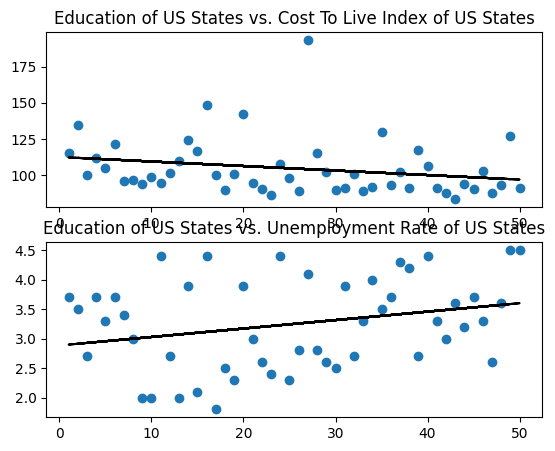

In [11]:
figure, axis = plt.subplots(2)
figure.set_figheight(5)
for i in range(0, 2):
    axis[i].scatter(education, others[cols[i]])
    axis[i].set_title(f"Education of US States vs. {cols[i]} of US States")
    m, b = np.polyfit(education, others[cols[i]], 1)
    axis[i].plot(education, m * education + b, color='black')

In [12]:
model = rankings.copy(deep=True)
model.head(n=50)

,State,Cost To Live Index,Unemployment Rate,Education Rank
0,Mississippi,83.3,3.6,43
1,Kansas,86.5,2.4,23
2,Alabama,87.9,2.6,47
3,Oklahoma,87.9,3.0,42
4,Georgia,88.8,2.8,26
5,Tennessee,89.0,3.3,33
6,Missouri,89.8,2.5,30
7,Iowa,89.9,2.5,18
8,West Virginia,90.5,3.7,45
9,Indiana,90.6,2.6,22


In [13]:
model_sub = model.iloc[:, [1,2,3]]
model_sub.head()

,Cost To Live Index,Unemployment Rate,Education Rank
0,83.3,3.6,43
1,86.5,2.4,23
2,87.9,2.6,47
3,87.9,3.0,42
4,88.8,2.8,26


In [30]:
X = model_sub.iloc[:, [0] + list(range(1, 2))]
y = model_sub['Education Rank']
cols = X.columns.tolist()

In [34]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

model = LinearRegression()
model.fit(X.iloc[:, 0:3], y)
y_pred = model.predict(X.iloc[:, 0:3])
print("Mean Squared Error:", mean_squared_error(y, y_pred))

Mean Squared Error: 170.73933645114172


In [35]:
from sklearn.tree import DecisionTreeRegressor
regressor = DecisionTreeRegressor()
regressor.fit(X.iloc[:, 0:3], y)
y_pred = regressor.predict(X.iloc[:, 0:3])

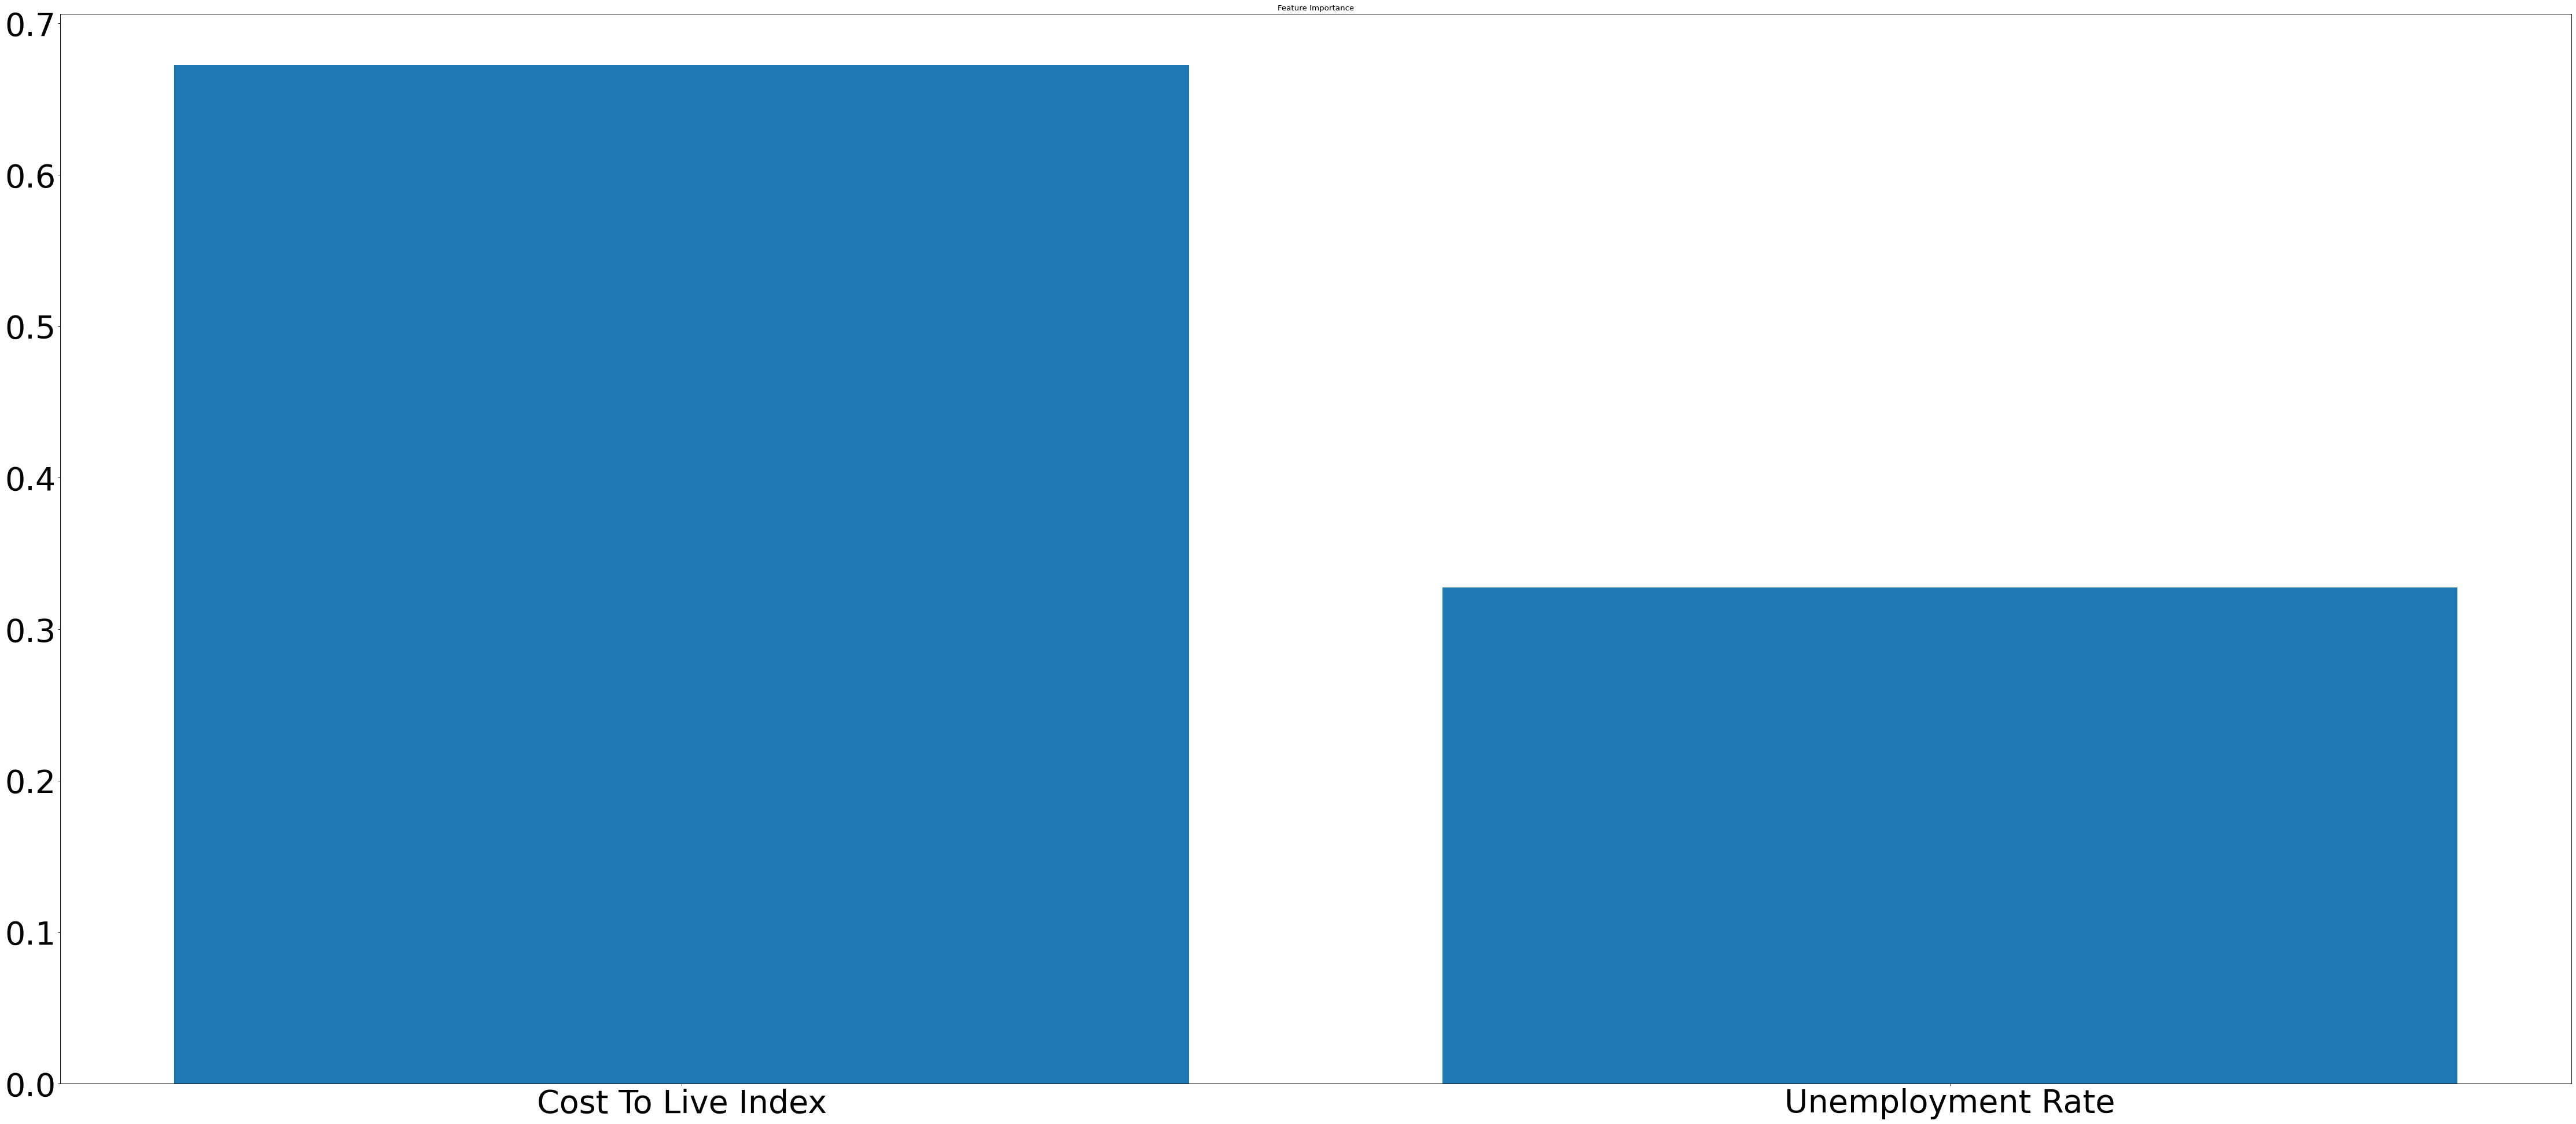

In [44]:
from matplotlib.pyplot import figure

figure(figsize=(70, 30), dpi=80)
feature_importance_dt = regressor.feature_importances_
feature_names = X.iloc[:, 0:3].columns

plt.bar(feature_names, feature_importance_dt.ravel())
plt.tick_params(axis='both', which='major', labelsize=50)
plt.title("Feature Importance")
plt.show()

In [45]:
var = {"feature":cols, "feature_importance":feature_importance_dt.ravel()}
pd.DataFrame(var)

,feature,feature_importance
0,Cost To Live Index,0.672504
1,Unemployment Rate,0.327496
